## 텍스트 분류 - 뉴스
---
- scikit-learn의 dataset인 20대뉴스 데이터 분류
- https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_20newsgroups.html?highlight=#sklearn.datasets.fetch_20newsgroups

In [1]:
import numpy as np

In [2]:
from sklearn.datasets import fetch_20newsgroups

In [3]:
newsData=fetch_20newsgroups(subset='all', remove=('header', 'footers'))

In [4]:
newsData.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [5]:
print(f'data => {len(newsData["data"])}')

data => 18846


In [6]:
newsData20 = newsData["data"]
type(newsData20)

list

In [7]:
allnewsData = newsData20[1:10000]

In [8]:
# 타겟 데이터 확인 --------------------------------------------------
target=newsData["target"]
type(target)

numpy.ndarray

In [9]:
print(f'newsData => {len(newsData["target_names"])}')
for name in newsData["target_names"]:
    print(name)
print(f'target => {target}')

newsData => 20
alt.atheism
comp.graphics
comp.os.ms-windows.misc
comp.sys.ibm.pc.hardware
comp.sys.mac.hardware
comp.windows.x
misc.forsale
rec.autos
rec.motorcycles
rec.sport.baseball
rec.sport.hockey
sci.crypt
sci.electronics
sci.med
sci.space
soc.religion.christian
talk.politics.guns
talk.politics.mideast
talk.politics.misc
talk.religion.misc
target => [10  3 17 ...  3  1  7]


In [10]:
# allnewsData = []

# for i in range(21):
#     allnewsData.append(newsData20[i])

In [11]:
allnewsData

['From: mblawson@midway.ecn.uoknor.edu (Matthew B Lawson)\nSubject: Which high-performance VLB video card?\nSummary: Seek recommendations for VLB video card\nNntp-Posting-Host: midway.ecn.uoknor.edu\nOrganization: Engineering Computer Network, University of Oklahoma, Norman, OK, USA\nKeywords: orchid, stealth, vlb\nLines: 21\n\n  My brother is in the market for a high-performance video card that supports\nVESA local bus with 1-2MB RAM.  Does anyone have suggestions/ideas on:\n\n  - Diamond Stealth Pro Local Bus\n\n  - Orchid Farenheit 1280\n\n  - ATI Graphics Ultra Pro\n\n  - Any other high-performance VLB card\n\n\nPlease post or email.  Thank you!\n\n  - Matt\n',
 'From: hilmi-er@dsv.su.se (Hilmi Eren)\nSubject: Re: ARMENIA SAYS IT COULD SHOOT DOWN TURKISH PLANES (Henrik)\nLines: 95\nNntp-Posting-Host: viktoria.dsv.su.se\nReply-To: hilmi-er@dsv.su.se (Hilmi Eren)\nOrganization: Dept. of Computer and Systems Sciences, Stockholm University\n\n\n\n\n|>The student of "regional killings" 

## [2] 데이터 전처리
---
- (1) 수집 데이터 기반 단어사진 생성
- (2) 텍스트 데이터 => 수치 데이터 변환
- (3) 데이터 길이 결정
- (4) 2진 정수화 변환

In [12]:
from tensorflow.keras.preprocessing.text import text_to_word_sequence, Tokenizer

In [13]:
tokenizer = Tokenizer(oov_token=1)

# 단어 빈도수가 높은 순으로 낮은 정수 인덱스 부여
tokenizer.fit_on_texts(allnewsData)

In [14]:
print(allnewsData)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [15]:
# token 에서 인덕스 번호와 단어
print('인덱스 번호와 단어: ', tokenizer.word_index)

인덱스 번호와 단어:  {1: 1, 'the': 2, 'to': 3, 'of': 4, 'a': 5, 'and': 6, 'in': 7, 'i': 8, 'is': 9, 'that': 10, 'it': 11, 'for': 12, 'you': 13, 'from': 14, 'on': 15, 'this': 16, 'edu': 17, 'be': 18, 'not': 19, 'have': 20, 'are': 21, 'with': 22, 'as': 23, '1': 24, 'or': 25, 'was': 26, 'if': 27, 'but': 28, 'subject': 29, 'lines': 30, 'they': 31, 'organization': 32, 'at': 33, 'by': 34, 'com': 35, 'x': 36, 'can': 37, 'an': 38, '2': 39, '0': 40, 'what': 41, 'would': 42, 'all': 43, 'will': 44, 'my': 45, 're': 46, 'there': 47, 'do': 48, 'one': 49, 'writes': 50, 'about': 51, 'we': 52, 'so': 53, 'article': 54, 'he': 55, 'no': 56, 'has': 57, 'your': 58, 'any': 59, 'some': 60, '3': 61, 'who': 62, 'which': 63, 'me': 64, 'out': 65, 'more': 66, "'ax": 67, 'people': 68, 'when': 69, 'posting': 70, 'like': 71, 'were': 72, 'their': 73, "don't": 74, 'just': 75, 'host': 76, 'up': 77, '4': 78, 'other': 79, 'university': 80, 'nntp': 81, 'how': 82, 'know': 83, 'get': 84, 'them': 85, 'had': 86, 'than': 87, 'only': 88

In [16]:
# 단어 출력 횟수
print('단어 출력 횟수: ',tokenizer.word_counts)

단어 출력 횟수:  OrderedDict([('from', 19391), ('mblawson', 1), ('midway', 113), ('ecn', 154), ('uoknor', 82), ('edu', 16675), ('matthew', 262), ('b', 1976), ('lawson', 9), ('subject', 10760), ('which', 5353), ('high', 969), ('performance', 433), ('vlb', 121), ('video', 607), ('card', 920), ('summary', 531), ('seek', 96), ('recommendations', 48), ('for', 23140), ('nntp', 4319), ('posting', 4833), ('host', 4470), ('organization', 9905), ('engineering', 476), ('computer', 1620), ('network', 451), ('university', 4356), ('of', 57410), ('oklahoma', 44), ('norman', 50), ('ok', 594), ('usa', 1446), ('keywords', 802), ('orchid', 57), ('stealth', 67), ('lines', 10425), ('21', 901), ('my', 7466), ('brother', 99), ('is', 35684), ('in', 41354), ('the', 122728), ('market', 266), ('a', 52598), ('that', 32031), ('supports', 194), ('vesa', 131), ('local', 696), ('bus', 466), ('with', 14673), ('1', 11955), ('2mb', 45), ('ram', 363), ('does', 3398), ('anyone', 2008), ('have', 15366), ('suggestions', 233), ('i

In [17]:
# 문장을 생성된 사전(voca)를 기반으로 수치화
print(tokenizer.texts_to_sequences(allnewsData))

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [18]:
data=tokenizer.texts_to_sequences(allnewsData)

In [19]:
data

[[14,
  55156,
  2637,
  2021,
  3467,
  17,
  1230,
  157,
  16927,
  29,
  63,
  323,
  728,
  2498,
  512,
  341,
  583,
  3060,
  5250,
  12,
  2498,
  512,
  341,
  81,
  70,
  76,
  2637,
  2021,
  3467,
  17,
  32,
  646,
  185,
  689,
  80,
  4,
  5645,
  5083,
  526,
  213,
  404,
  4611,
  4098,
  2498,
  30,
  352,
  45,
  2981,
  9,
  7,
  2,
  1209,
  12,
  5,
  323,
  728,
  512,
  341,
  10,
  1636,
  2334,
  452,
  663,
  22,
  24,
  5544,
  866,
  96,
  155,
  20,
  1379,
  1044,
  15,
  2311,
  4098,
  1100,
  452,
  663,
  4611,
  39612,
  12697,
  2572,
  325,
  3061,
  1100,
  59,
  79,
  323,
  728,
  2498,
  341,
  178,
  313,
  25,
  467,
  1214,
  13,
  2186],
 [14,
  15812,
  4497,
  15813,
  2931,
  814,
  15812,
  24121,
  29,
  46,
  1267,
  314,
  11,
  107,
  2523,
  236,
  796,
  4498,
  6099,
  30,
  1525,
  81,
  70,
  76,
  55157,
  15813,
  2931,
  814,
  151,
  3,
  15812,
  4497,
  15813,
  2931,
  814,
  15812,
  24121,
  32,
  675,
  4,
  185,
  

In [20]:
target

array([10,  3, 17, ...,  3,  1,  7])

In [21]:
from tensorflow.keras.utils import pad_sequences

In [22]:
pad_sequences(data)

array([[     0,      0,      0, ...,   1214,     13,   2186],
       [     0,      0,      0, ...,      2,    944,   1085],
       [     0,      0,      0, ...,    466,    310,    707],
       ...,
       [     0,      0,      0, ...,   1140,    272,   2034],
       [     0,      0,      0, ...,    192,    166,   1506],
       [     0,      0,      0, ...,  20929, 106910,  55155]])

In [23]:
# [2-1]데이터별 길이 결정
padded = pad_sequences(data)
print(padded.shape)

(9999, 15604)


In [24]:
target1=target[1:10000]
target1.shape

(9999,)

In [25]:
# (1) 전체 리뷰의 길이 측정
all_length=np.array([len(x) for x in data])

print(f'all_length : {np.mean(all_length)}, {np.median(all_length)}')

np.unique(all_length)
np.unique(all_length, return_counts=True)

all_length : 285.15861586158616, 168.0


(array([   11,    12,    13, ..., 14689, 14751, 15604]),
 array([1, 6, 1, ..., 1, 1, 1], dtype=int64))

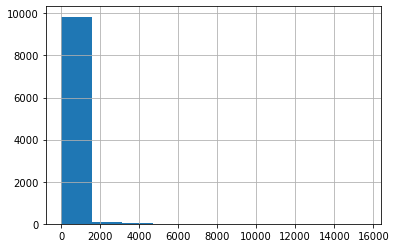

In [26]:
import matplotlib.pyplot as plt

plt.hist(all_length)
plt.grid()
plt.show()

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(padded,
                                                   target1,
                                                   test_size=0.2,
                                                   random_state=42)

In [38]:
X_train.shape

(7999, 15604)

In [39]:
# [2-2] 데이터별 길이 변경
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(X_train, maxlen=15604)
test_seq = pad_sequences(X_test, maxlen=15604)
train_seq.shape

(7999, 15604)

In [40]:
from tensorflow.keras.utils import to_categorical

In [41]:
train_oh = to_categorical(train_seq)
test_oh = to_categorical(test_seq)

MemoryError: Unable to allocate 48.5 TiB for an array with shape (124816396, 106903) and data type float32

In [37]:
X_train, X_val, y_train, y_val = train_test_split(train_oh,
                                                  y_train, test_size=0.2, random_state=42)

NameError: name 'train_oh' is not defined

In [ ]:
print(f'X_train : {X_train.shape}\ntest_seq : {test_seq.shape}\nX_val : {X_val.shape}')
print(f'X_train : {y_train.shape}\ny_test : {y_test.shape}\ny_val : {y_val.shape}')

## 모델
---

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

In [ ]:
model=Sequential()
model.add(SimpleRNN(9, input_shape=(100, 6079)))
model.add(Dense(1, activation='softmax'))
model.summary()

In [ ]:
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics='accuracy')

In [ ]:
from keras.callbacks import EarlyStopping
earlyST=EarlyStopping(monitor='val_loss', patience=3)

In [ ]:
history=model.fit(X_train, y_train, batch_size=32,
                    epochs = 50, validation_data = (X_val,y_val),
                    verbose = 1, callbacks=[earlyST])